In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

img = Image.open('input.jpg')

In [2]:
img_h, img_w, _ = np.array(img).shape
cut_h, cut_w = img_h / 29, img_w / 50

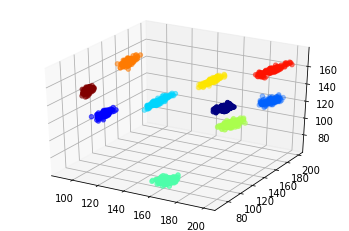

In [3]:
pieces, cut_img = [], []
for row in range(29):
    for col in range(50):
        area = (cut_w * col + 4, cut_h * row + 4, cut_w * (col + 1) - 4, cut_h * (row + 1) - 4)
        cut = img.crop(area)
        cut_np = np.array(cut)
        cut_img.append(cut)
        pieces.append([np.mean(cut_np[:, :, 0]), np.mean(cut_np[:, :, 1]), np.mean(cut_np[:, :, 2])])

df = pd.DataFrame(pieces, columns=('r', 'g', 'b'))
df['id'] = KMeans(n_clusters=10).fit(df.values).labels_

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df['r'], df['g'], df['b'], c=df['id'], cmap='jet')
plt.show()

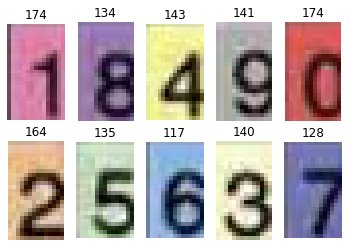

In [5]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(pick[i])
    plt.axis('off')
    plt.title(cnt[i])
plt.show()